# The sample quantiles

This workbook looks at the quantile of a finite set of IID samples.  Specifically, it computes 
the ensemble quantiles for sets of U(0,1) of size n. 

In [133]:
import sympy as sp
from matplotlib import pyplot as plot

import LocUtil as LU

In [123]:
xSym = sp.Symbol('x')
ySym = sp.Symbol('y')
nSym = sp.Symbol('n', positive=True, integer=True)

xMaxSym = sp.Symbol('X_x')
xMinSym = sp.Symbol('X_n')

In [137]:
nSamp = 99
nPlot = 101

## Extreme Values

### X_max

PXLTY (Probability of X Less Than Y)

In [53]:
pxlty = ySym

In [54]:
pMaxLtY = pxlty ** nSym
pMaxLtY

y**n

In [55]:
cXMax = pMaxLtY.subs(ySym, xMaxSym)
cXMax

X_x**n

In [56]:
pXMax = cXMax.diff(xMaxSym).simplify()
pXMax

X_x**(n - 1)*n

In [57]:
sp.integrate(pXMax * xMaxSym, xMaxSym).simplify()

X_x**(n + 1)*n/(n + 1)

In [58]:
temp = nSym/(nSym + 1) * xMaxSym ** (nSym + 1)
eXMax = (temp.subs(xMaxSym,1) - temp.subs(xMaxSym,0)).simplify()
eXMax

n/(n + 1)

In [63]:
sp.series(eXMax, x0=sp.oo)

-1/n**5 + n**(-4) - 1/n**3 + n**(-2) - 1/n + 1 + O(n**(-6), (n, oo))

### X_min

## Arbitrary Quantiles

Define m to be the number of samples less than y.  This implies that n - m samples are greater 
than y.

The pneumonic Mn will be sued to mean m of n samples are less than y.

In [111]:
mSym = sp.Symbol('m', positive=True, integer=True)

In [171]:
pMnLtY = ySym ** mSym * (1 - ySym) ** (nSym - mSym)
pMnLtY

y**m*(1 - y)**(-m + n)

Text(0, 0.5, 'Prob. of Max < Y')

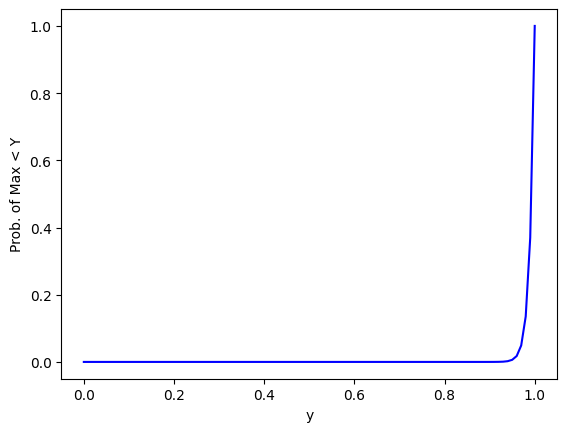

In [173]:
xGrid = LU.Grid1(0,1, nPlot)
cMaxL = tuple(pMnLtY.subs({mSym: nSym, nSym: nSamp, ySym: x}).evalf() for x in xGrid)

plot.plot(xGrid, cMaxL, c='blue')

plot.xlabel('y')
plot.ylabel('Prob. of Max < Y')

#### Quasi manually simplification

In [196]:
temp0 = pMnLtY.diff(ySym)
temp0

m*y**m*(1 - y)**(-m + n)/y + y**m*(1 - y)**(-m + n)*(m - n)/(1 - y)

In [202]:
terms = temp0.args
terms

(m*y**m*(1 - y)**(-m + n)/y, y**m*(1 - y)**(-m + n)*(m - n)/(1 - y))

In [214]:
term0 = terms[0].simplify()
term0

m*y**(m - 1)*(1 - y)**(-m + n)

In [215]:
term1 = terms[1].simplify().subs(ySym, 1 - xSym).simplify().subs(xSym, 1 - ySym)
term1

y**m*(1 - y)**(-m + n - 1)*(m - n)

In [223]:
pMn = term0 + term1
pMn

m*y**(m - 1)*(1 - y)**(-m + n) + y**m*(1 - y)**(-m + n - 1)*(m - n)

#### The expected value

In [264]:
kSym = sp.Symbol('k', positive=True, integer=True)
temp0 = pMn.subs(nSym, kSym + mSym)
temp0

-k*y**m*(1 - y)**(k - 1) + m*y**(m - 1)*(1 - y)**k

In [265]:
temp1 = sp.integrate(temp0 * ySym, ySym)
temp1

-k*y**2*y**m*gamma(m + 2)*hyper((1 - k, m + 2), (m + 3,), y*exp_polar(2*I*pi))/gamma(m + 3) + m*y*y**m*gamma(m + 1)*hyper((-k, m + 1), (m + 2,), y*exp_polar(2*I*pi))/gamma(m + 2)

In [269]:
temp2 = temp1.subs(kSym, nSym - mSym)
temp2

m*y*y**m*gamma(m + 1)*hyper((m - n, m + 1), (m + 2,), y*exp_polar(2*I*pi))/gamma(m + 2) - y**2*y**m*(-m + n)*gamma(m + 2)*hyper((m - n + 1, m + 2), (m + 3,), y*exp_polar(2*I*pi))/gamma(m + 3)

In [271]:
expQ = (temp2.subs(ySym, 1) - temp2.subs(ySym, 0)).simplify()
expQ

-factorial(m)*factorial(-m + n)/factorial(n + 1)

In [272]:
expQ.subs(mSym, 0).simplify()

-1/(n + 1)

In [274]:
expQ.subs(mSym, 1).simplify()

-1/(n*(n + 1))

In [276]:
expQ.subs(mSym, 2).factor()

-2*factorial(n - 2)/factorial(n + 1)

In [277]:
expQ.subs(mSym, 3).factor()

-6*factorial(n - 3)/factorial(n + 1)

In [273]:
expQ.subs(mSym, nSym).simplify()

-1/(n + 1)

#### Debug

In [124]:
pxlty = ySym
pxlty

y

In [144]:
pMaxLtY = pxlty ** nSym
pMaxLtY

y**n

In [145]:
cMax = pMaxLtY

Text(0, 0.5, 'Prob. of Max < Y')

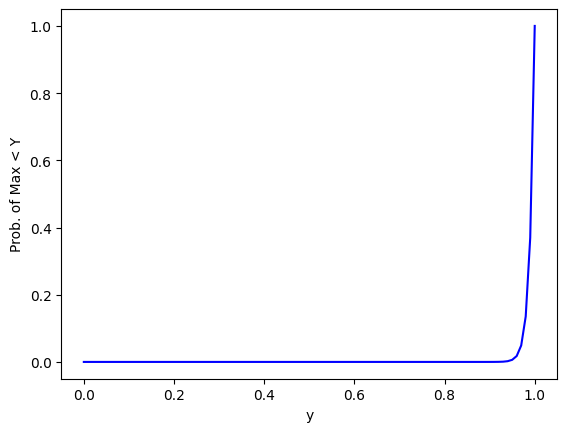

In [151]:
xGrid = LU.Grid1(0,1, nPlot)
cMaxL = tuple(cMax.subs(ySym, x).subs(nSym, nSamp).evalf() for x in xGrid)

plot.plot(xGrid, cMaxL, c='blue')

plot.xlabel('y')
plot.ylabel('Prob. of Max < Y')

In [153]:
pMax = cMax.diff(ySym)
pMax

n*y**n/y

In [155]:
temp = expVal = sp.integrate(pMax * ySym, ySym)
temp

n*y**(n + 1)/(n + 1)

In [156]:
expMax = (temp.subs(ySym, 1) - temp.subs(ySym, 0)).simplify()
expMax

n/(n + 1)

In [157]:
sp.series(expMax, x0=sp.oo)

-1/n**5 + n**(-4) - 1/n**3 + n**(-2) - 1/n + 1 + O(n**(-6), (n, oo))